In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
#import scipy.stats as ss
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)

In [2]:
AAPL = pd.read_csv('C:\\Users\lichl\Desktop\INFO 7374\data\AAPL.csv')
ADS = pd.read_csv('C:\\Users\lichl\Desktop\INFO 7374\data\ADS.csv')
SP500 = pd.read_csv('C:\\Users\lichl\Desktop\INFO 7374\data\SP500.csv')
FF3 = pd.read_csv('C:\\Users\lichl\Desktop\INFO 7374\data\F-F_Research_Data_Factors_daily.csv')
multi = pd.read_csv('C:\\Users\lichl\Desktop\INFO 7374\data\multistocks.csv')

FileNotFoundError: [Errno 2] File b'C:\\Users\\lichl\\Desktop\\INFO 7374\\data\\AAPL.csv' does not exist: b'C:\\Users\\lichl\\Desktop\\INFO 7374\\data\\AAPL.csv'

In [3]:
data = AAPL.merge(ADS).merge(SP500).merge(FF3).merge(multi)
data = data.drop(columns=['Date', 'RF'])

train = data[:570]
test = data[570:]
print(data.head())
print(len(test))

data.to_csv("C:\\Users\lichl\Desktop\INFO 7374\data\data.csv")

NameError: name 'AAPL' is not defined

In [72]:
def ff(data):
    Y = data['Close'][1:].to_numpy()
    X = data[['Mkt-RF', 'SMB', 'HML']][:-1].to_numpy()
    X = np.column_stack([np.ones(len(X)),X])  
    
    Y_test = test['Close'][1:].to_numpy()
    X_test = test[['Mkt-RF', 'SMB', 'HML']][:-1].to_numpy()
    X_test = np.column_stack([np.ones(len(X_test)),X_test])
    
    invXX = np.linalg.inv(X.T@X)
    beta_hat = invXX@X.T@Y
    Y_hat = X_test@beta_hat
    
    residuals = Y_test - Y_hat
    R_square = 1- (residuals.T@residuals)/np.var(Y_test)/400
    
    return R_square, Y_hat

def ols(data):
    Y = data['Close'][1:].to_numpy()
    X = data[['Open', 'High', 'Low', 'Close', 'Volume', 'ADS_Index', 'SP500']][:-1].to_numpy()
    X = np.column_stack([np.ones(len(X)),X])  
        
    Y_test = test['Close'][1:].to_numpy()
    X_test = test[['Open', 'High', 'Low', 'Close', 'Volume', 'ADS_Index', 'SP500']][:-1].to_numpy()
    X_test = np.column_stack([np.ones(len(X_test)),X_test])  
    
    invXX = np.linalg.inv(X.T@X)
    beta_hat = invXX@X.T@Y
    Y_hat = X_test@beta_hat
    
    residuals = Y_test - Y_hat
    R_square = 1- (residuals.T@residuals)/np.var(Y_test)/400
    
    return R_square, Y_hat

def pairs(data):
    data = data[['Close', 'AMZN', 'FB', 'GOOGL', 'NFLX', 'NVDA', 'TSLA']]
    Y = data['Close'][1:].to_numpy()
    X = data[['AMZN', 'FB', 'GOOGL', 'NFLX', 'NVDA', 'TSLA']][:-1].to_numpy()
    X = np.column_stack([np.ones(len(X)),X])  
        
    Y_test = test['Close'][1:].to_numpy()
    X_test = test[['AMZN', 'FB', 'GOOGL', 'NFLX', 'NVDA', 'TSLA']][:-1].to_numpy()
    X_test = np.column_stack([np.ones(len(X_test)),X_test])
    
    invXX = np.linalg.inv(X.T@X)
    beta_hat = invXX@X.T@Y
    Y_hat = X_test@beta_hat

    residuals = Y_test - Y_hat
    R_square = 1- (residuals.T@residuals)/np.var(Y_test)/400
    
    return R_square, Y_hat


In [5]:
L = []
if L != []:
    L = []
for i in range(100):
    data = train.sample(n=400).sort_index()
    r1,l1 = ff(data)
    r2,l2 = ols(data)
    r3,l3 = pairs(data)
    if r1 > r2 and r1 > r3:
        L.append(l1)
    elif r2 > r1 and r2 > r3:
        L.append(l2)
    elif r3 > r1 and r3 > r2:
        L.append(l3)


In [6]:
res = L[0]
for j in range(1, 100):
    res += L[j]

result = res/100

100


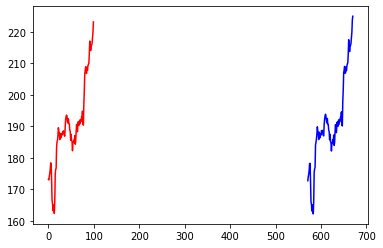

In [7]:
plt.plot(result,'r', test['Close'][1:], 'b')
print(len(result))

In [9]:
oooo = test['Open'][1:]
cccc = test['Close'][1:]
ress = 1
for i in range(100):
    if oooo.iloc[i] < result[i]:
        s = (cccc.iloc[i]-oooo.iloc[i])/oooo.iloc[i] + 1
        ress *= s
print(ress)

1.0842193831808211


In [10]:
res1 = (cccc.iloc[-1]-oooo.iloc[0])/oooo.iloc[0] + 1
print(res1)

1.3043478260869565


In [74]:
cccc = cccc.reset_index().drop(columns = 'index')
oooo = oooo.reset_index().drop(columns = 'index')